# Gold Price Forecasting
## Author: Syed Allahdad Hassan


>[Data Preparation](#scrollTo=rp26xq2apRZf)

>[Visualisations of all columns](#scrollTo=OgnR23rJpRZk)

>[Time Series Split](#scrollTo=mJ-D0r6HpRZn)

>[LGBM Regressor with Repeated stratified K fold](#scrollTo=rT7Ybbf4pRZo)

>[Above 99% accuracy in both train and test sets.](#scrollTo=0kZbg0LhpRZr)

>[Plot of actual vs Predicted](#scrollTo=mditK7TXpRZs)



![](https://images.pexels.com/photos/8442328/pexels-photo-8442328.jpeg)

Importing libraries and reading data from csv file

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\syeda\OneDrive\Desktop\Final year Project\gold-price\src\data\data.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
5,2011-12-22,156.350006,156.800003,155.330002,156.039993,156.039993,9888400,124.629997,125.400002,124.230003,...,51.770000,52.400002,49.656178,13179600,38.270000,38.549999,38.209999,38.279999,38.279999,5376800
6,2011-12-23,156.350006,156.490005,155.820007,156.309998,156.309998,3565100,125.669998,126.430000,125.410004,...,52.349998,52.790001,50.169365,4729000,38.470001,38.610001,38.369999,38.490002,38.490002,2162200
7,2011-12-27,155.080002,155.550003,154.539993,154.910004,154.910004,4918600,126.169998,126.820000,126.059998,...,51.680000,51.869999,49.295036,4786400,38.490002,39.209999,38.459999,39.060001,39.060001,7834100
8,2011-12-28,154.050003,154.259995,150.660004,151.029999,151.029999,16436100,126.510002,126.529999,124.730003,...,50.009998,50.060001,47.574883,14170400,38.880001,38.889999,38.189999,38.340000,38.340000,5654300
9,2011-12-29,149.089996,150.720001,148.270004,150.339996,150.339996,19812200,125.239998,126.250000,124.860001,...,49.220001,51.200001,48.658298,12196600,38.389999,38.459999,37.869999,38.410000,38.410000,8924300


# Data Preparation

In [2]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

Convert `Date` column to datetime type

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

The code calculates the absolute correlation values between the 'Adj Close' column and all other columns in the DataFrame 'df', then sorts them in descending order and stores the result in 'all_corr'. Finally, it displays the 'all_corr' Series.






In [4]:
all_corr = df.corr().abs()['Adj Close'].sort_values(ascending = False)
all_corr

Close         1.000000
Adj Close     1.000000
High          0.999535
Low           0.999532
Open          0.998976
                ...   
PLD_Trend     0.026536
USB_Trend     0.025933
EU_Trend      0.019913
USDI_Trend    0.016641
PLT_Trend     0.011355
Name: Adj Close, Length: 81, dtype: float64

The code creates a new Series 'corr_drop' containing only the correlation values from 'all_corr' that are less than 0.35, indicating weak correlations. It then displays the 'corr_drop' Series.






In [5]:
corr_drop = all_corr[all_corr < 0.35]
corr_drop

Volume         0.246778
SP_volume      0.241949
OF_Volume      0.225436
PLD_High       0.217490
PLD_Open       0.216426
PLD_Low        0.214919
PLD_Price      0.213179
USDI_Volume    0.205954
DJ_volume      0.155526
EG_volume      0.126586
RHO_PRICE      0.095782
OS_Trend       0.059510
OF_Trend       0.048205
SF_Trend       0.028100
PLD_Trend      0.026536
USB_Trend      0.025933
EU_Trend       0.019913
USDI_Trend     0.016641
PLT_Trend      0.011355
Name: Adj Close, dtype: float64

The code creates a list 'to_drop' containing column names with weak correlations from DataFrame 'df'. It then creates a new DataFrame 'df2' by dropping the columns listed in 'to_drop' and displays the first few rows of 'df2'.







In [6]:
to_drop = list(corr_drop.index)
df2 = df.drop(to_drop, axis = 1)
df2.head()

,Date,Open,High,Low,Close,Adj Close,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


The code sets the "Date" column as the new index for DataFrame 'df2', essentially making the "Date" column the row labels. It then displays the updated 'df2' DataFrame.






In [7]:
df2 = df2.set_index("Date")
df2

,Open,High,Low,Close,Adj Close,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,123.029999,123.199997,121.989998,122.180000,105.441238,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,122.230003,122.949997,121.300003,121.589996,105.597549,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,122.059998,122.320000,120.029999,120.290001,104.468536,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,122.180000,124.139999,120.370003,123.930000,107.629784,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,123.930000,124.360001,122.750000,124.169998,107.838242,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,239.039993,240.839996,234.270004,234.339996,234.339996,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,235.970001,246.179993,233.759995,246.179993,246.179993,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,242.570007,248.289993,238.960007,248.070007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700


# Visualisations of all columns

The code imports the required modules, defines some lists and variables, and creates a function 'show_raw_visualization' to display visualizations of various features from the DataFrame 'df'. The function plots each feature's data against time using subplots and assigns different colors to each feature. The resulting visualizations are displayed using Matplotlib.






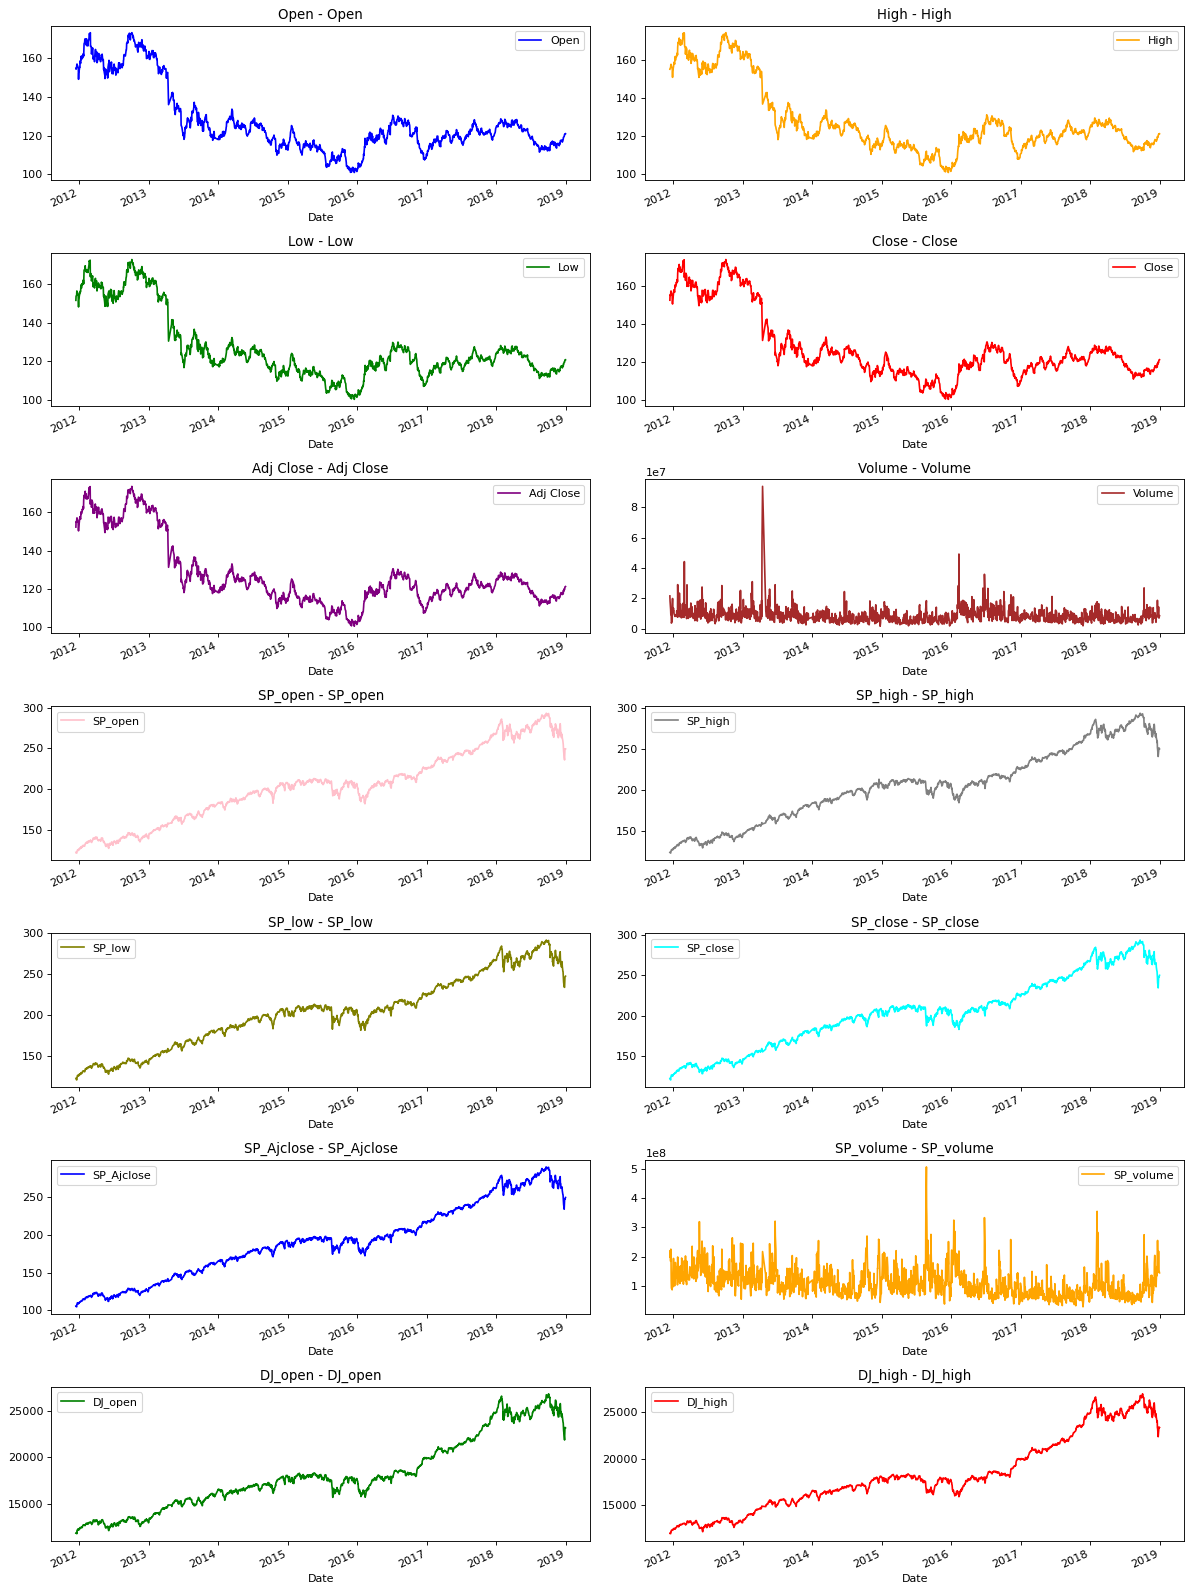

In [8]:
import matplotlib.pyplot as plt

titles = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close',
          'SP_Ajclose','SP_volume','DJ_open', 'DJ_high' ]
feature_keys = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close',
                'SP_Ajclose', 'SP_volume','DJ_open', 'DJ_high']

colors = [ "blue","orange","green","red","purple","brown","pink","gray","olive", "cyan"]

date_time_key = "Date"

def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

In the given code, two lists 'titles' and 'feature_keys' are defined to specify the titles and feature names. Then, the function 'show_raw_visualization' is called with DataFrame 'df' to display visualizations of the specified features against time using Matplotlib.






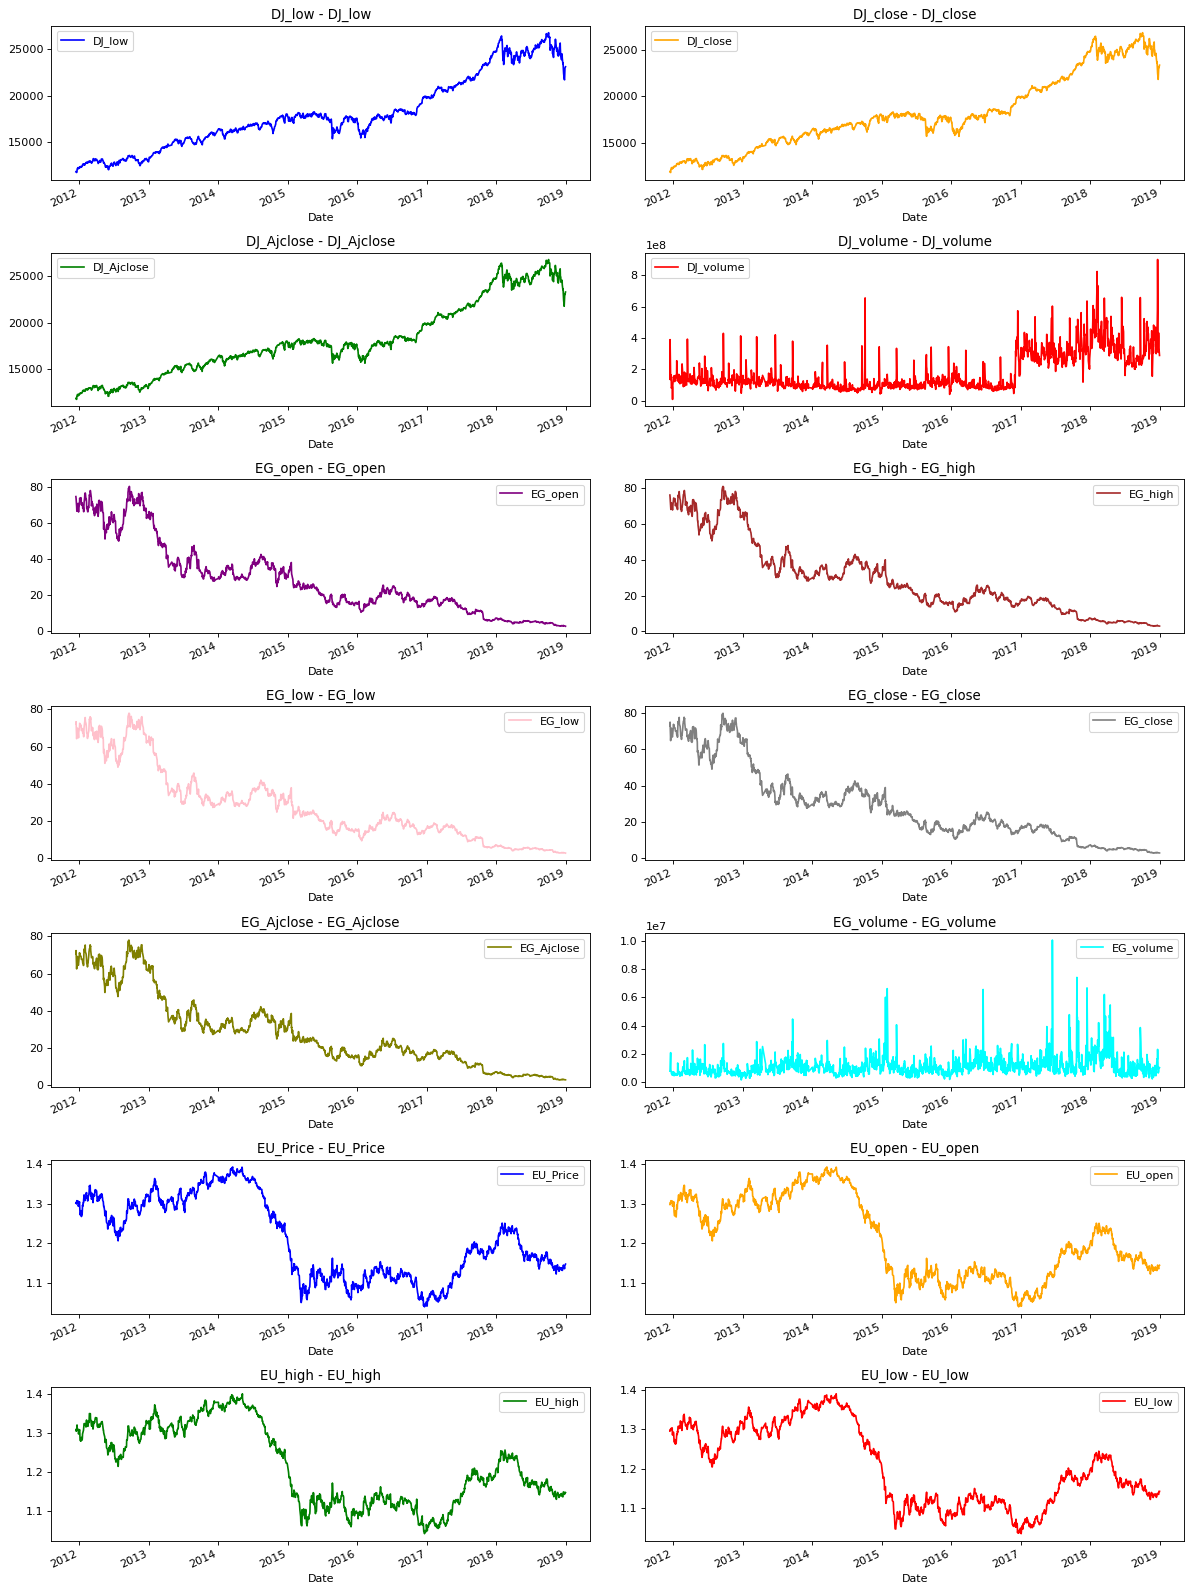

In [9]:
titles = ['DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low']
feature_keys = ['DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low']
show_raw_visualization(df)


In the given code, two lists 'titles' and 'feature_keys' are defined to specify the titles and feature names. Then, the function 'show_raw_visualization' is called with DataFrame 'df' to display visualizations of the specified features against time using Matplotlib.






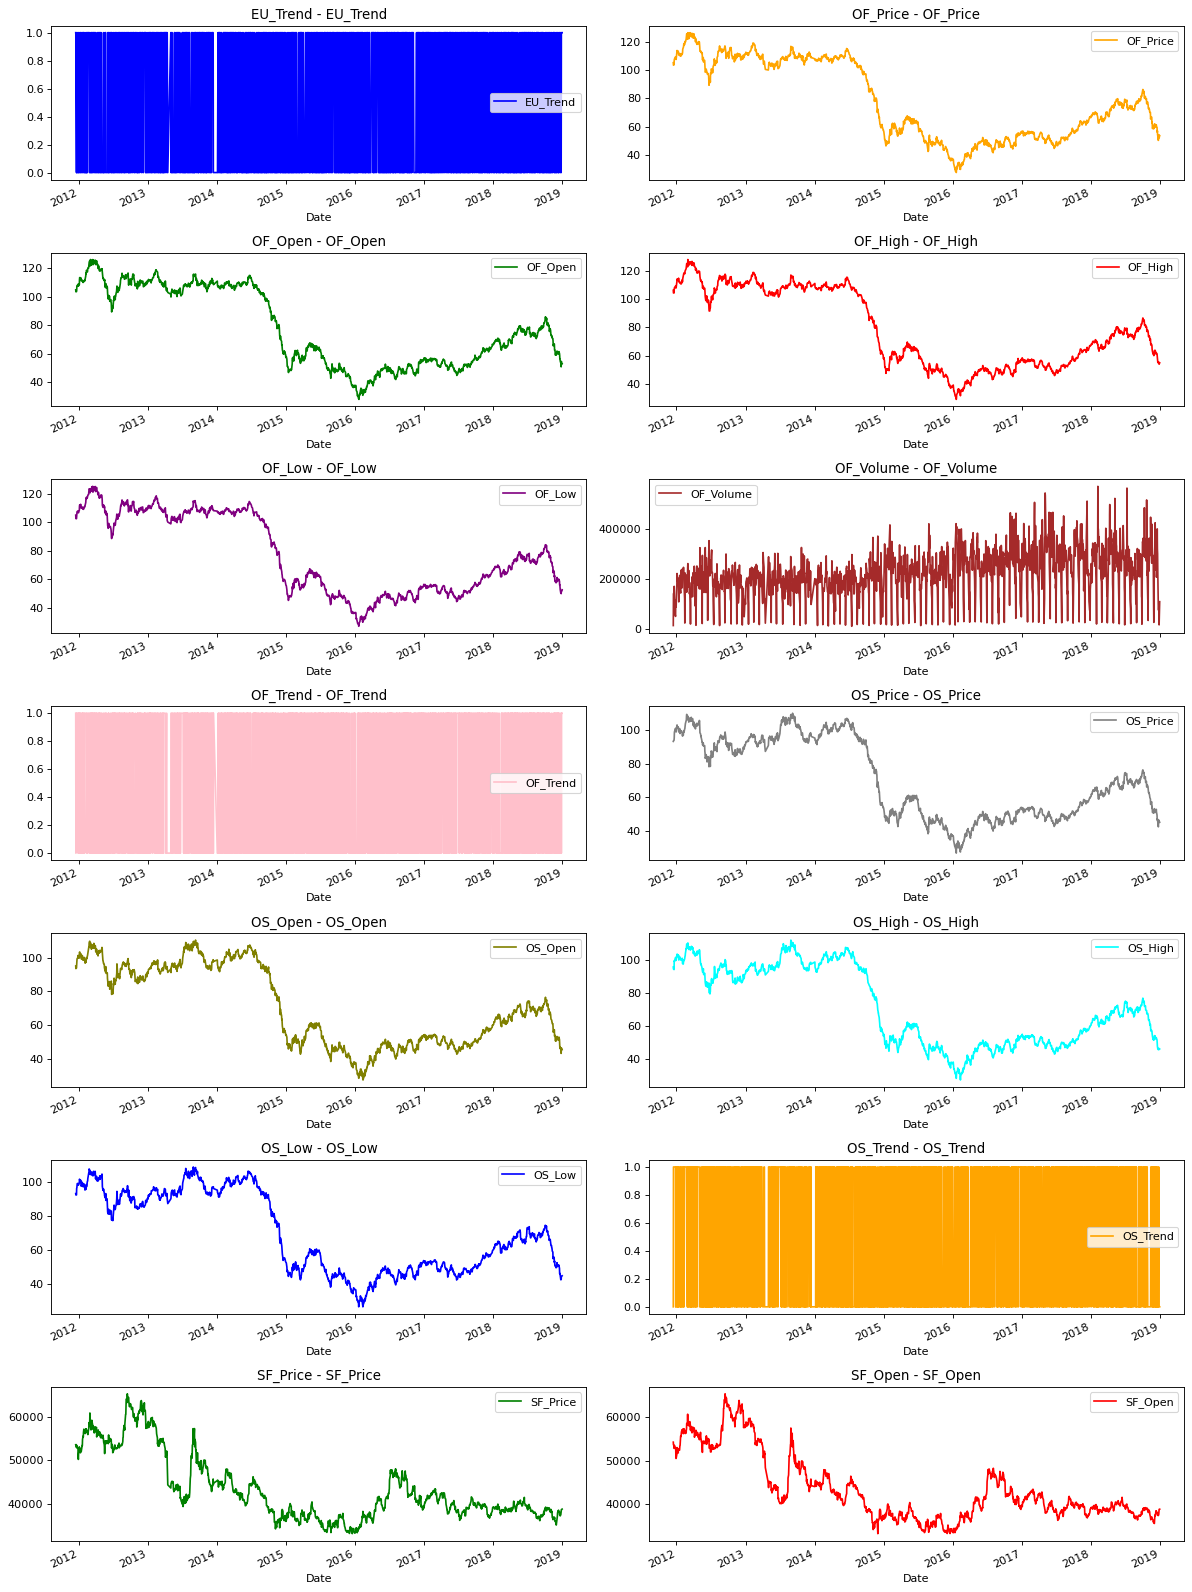

In [10]:
titles = ['EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open']
feature_keys = ['EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open']
show_raw_visualization(df)

In the given code, two lists 'titles' and 'feature_keys' are defined to specify the titles and feature names. Then, the function 'show_raw_visualization' is called with DataFrame 'df' to display visualizations of the specified features against time using Matplotlib.






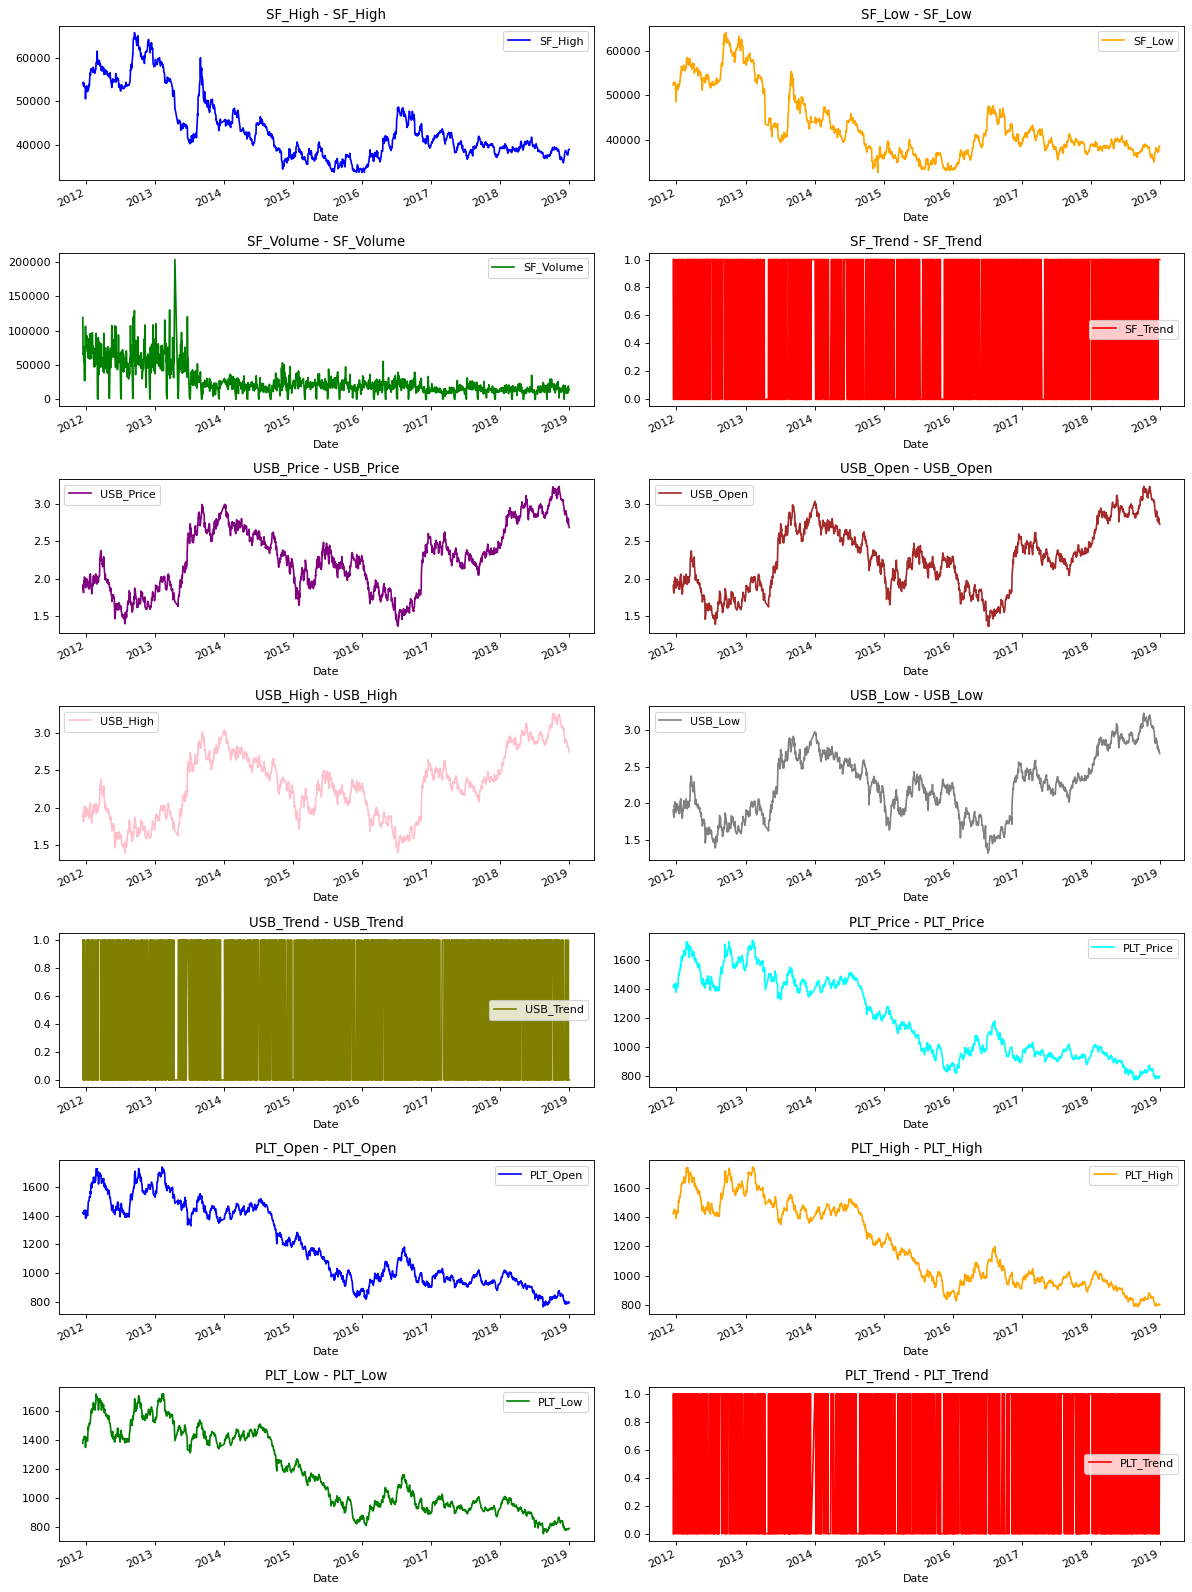

In [11]:
titles = ['SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend']
feature_keys = ['SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend']
show_raw_visualization(df)

In the given code, two lists 'titles' and 'feature_keys' are defined to specify the titles and feature names. Then, the function 'show_raw_visualization' is called with DataFrame 'df' to display visualizations of the specified features against time using Matplotlib.






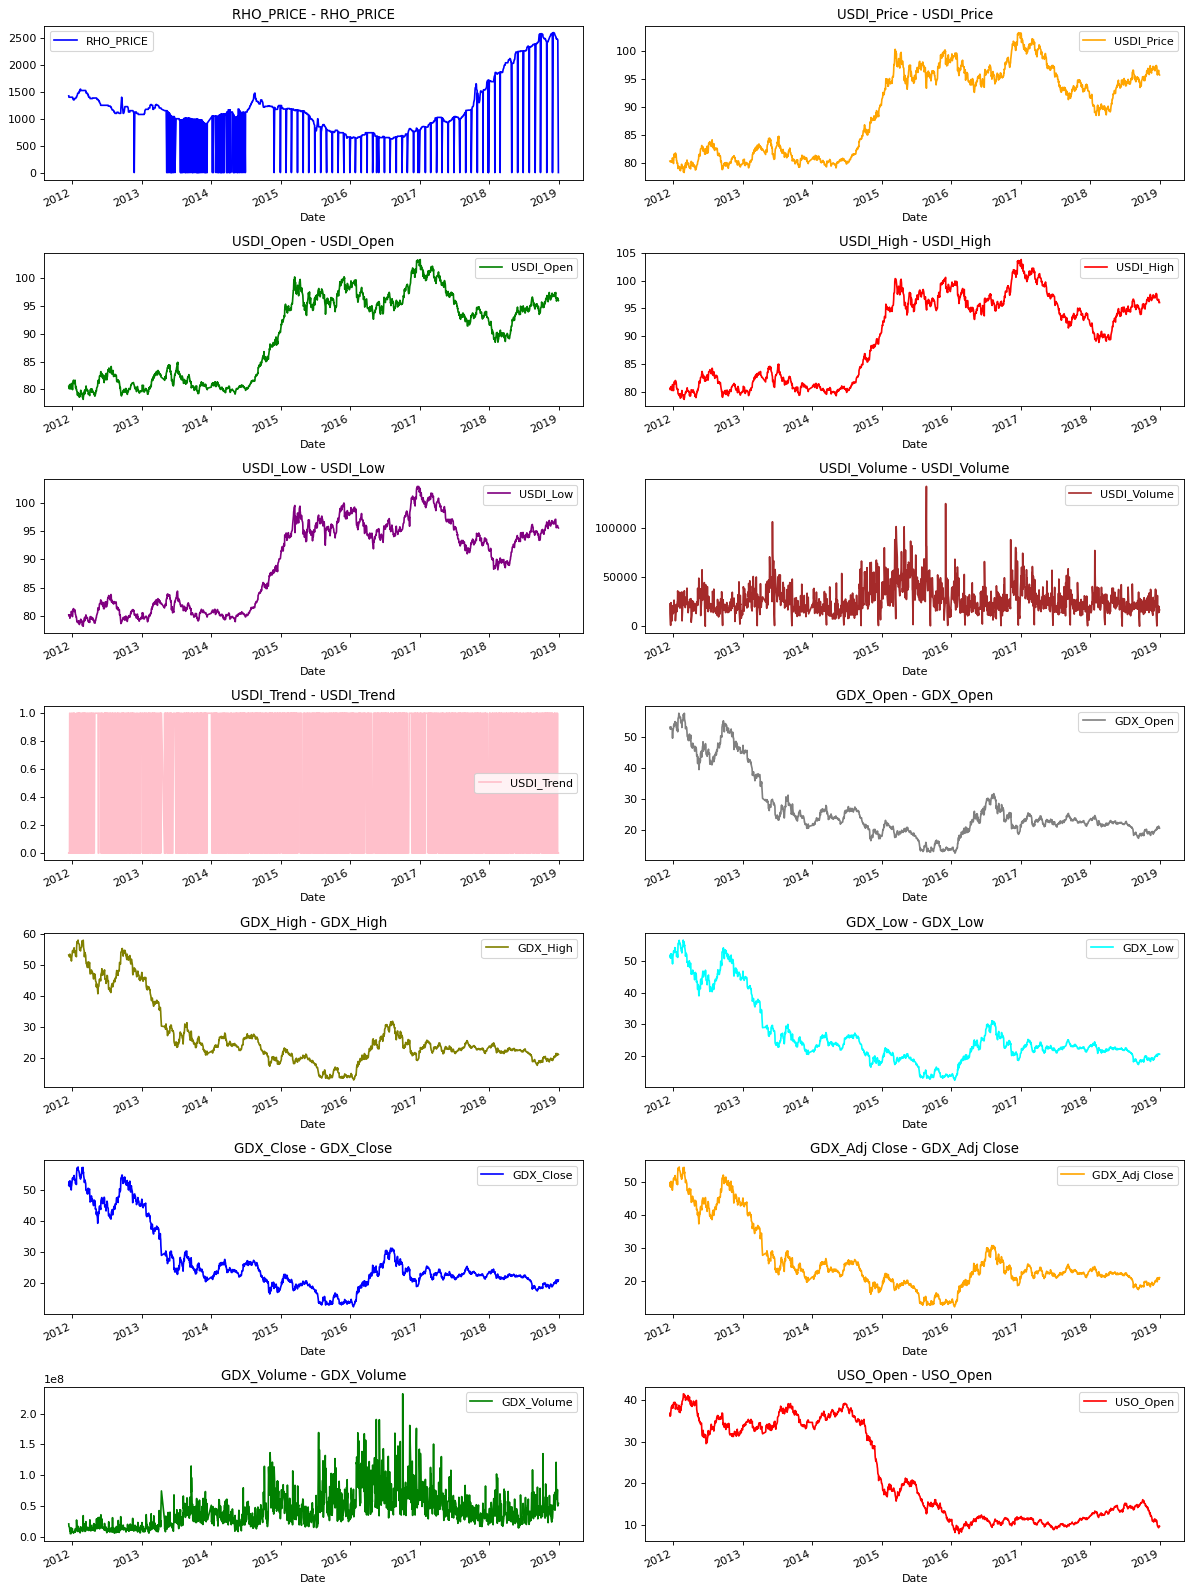

In [12]:
titles = ['RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       ]
feature_keys = ['RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       ]
show_raw_visualization(df)

The code defines a new function 'show_raw_visualization_small' that displays visualizations of a subset of specified features ('USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume') against time using a smaller layout with 3 rows and 2 columns of plots. The function is then called with DataFrame 'df' to display these visualizations using Matplotlib.






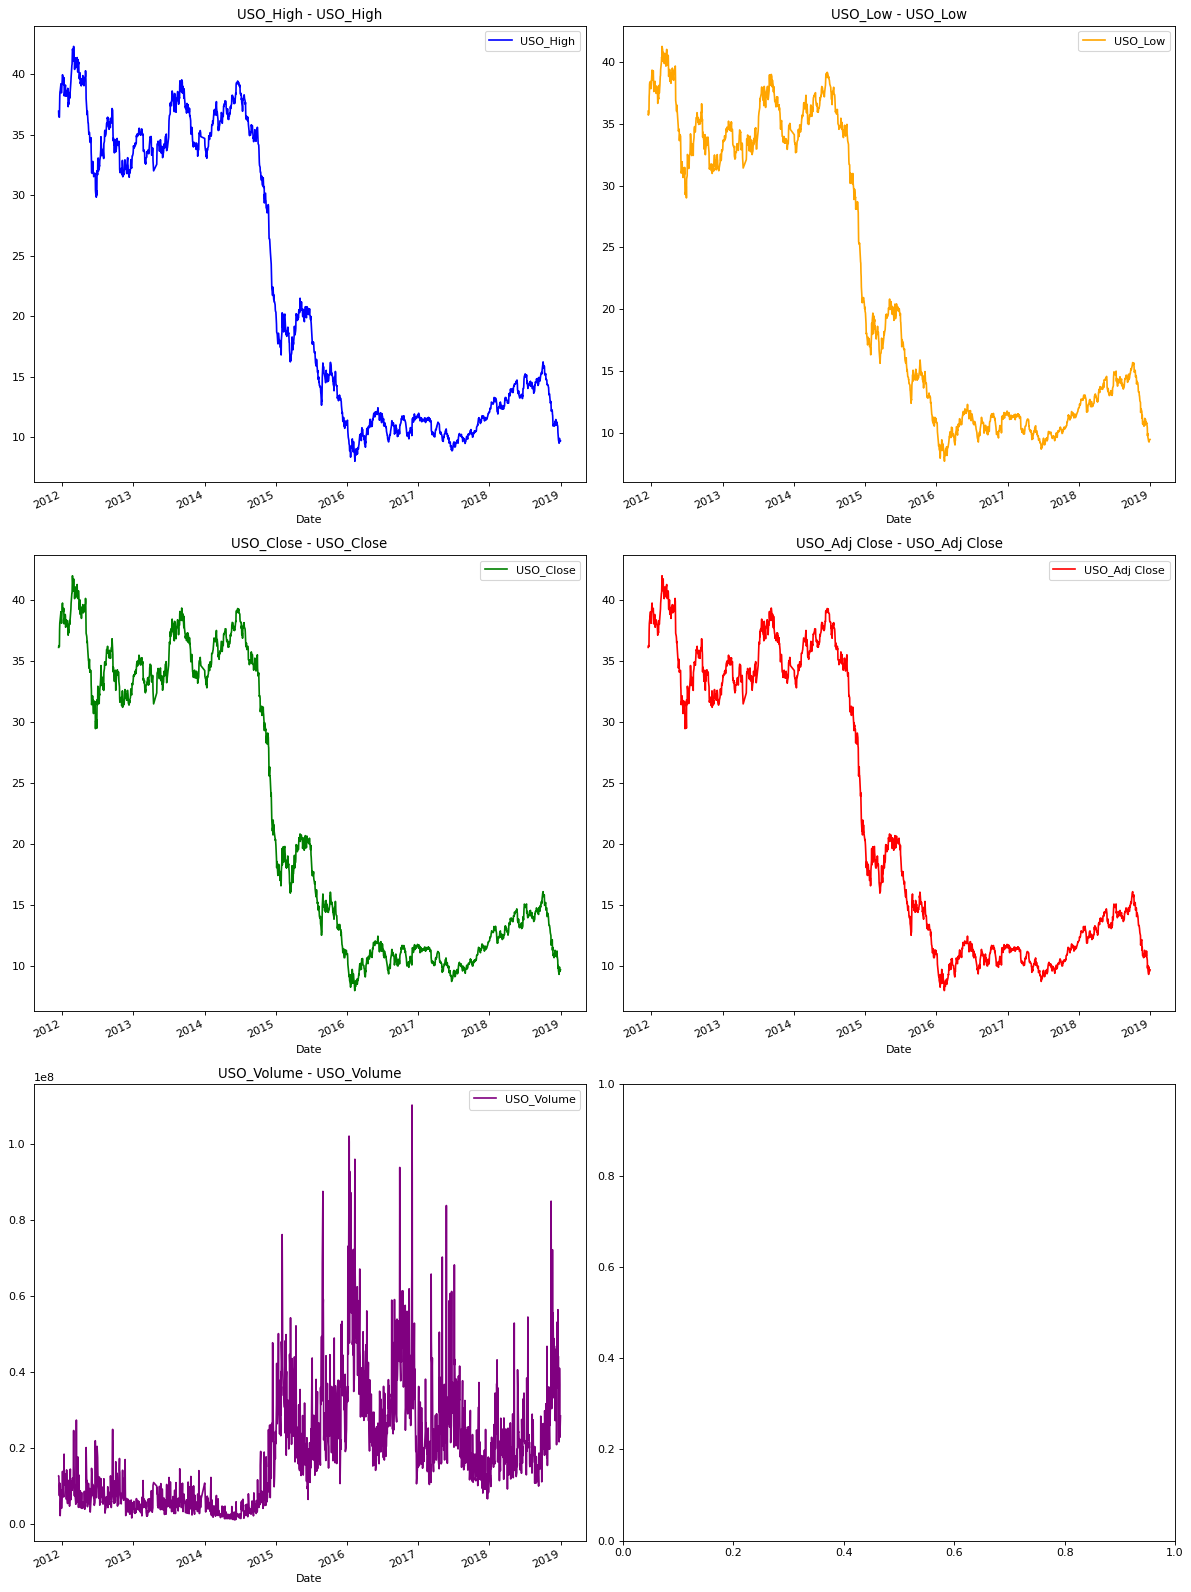

In [13]:
titles = ['USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume']
feature_keys = ['USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume']

def show_raw_visualization_small(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=3, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization_small(df)


# Time Series Split

The code imports the TimeSeriesSplit class from scikit-learn, creates a TimeSeriesSplit object 'tss' with 6 splits for time series cross-validation. It then prepares the feature matrix 'X' by dropping the 'Adj Close' column from DataFrame 'df2', and the target vector 'y' is set to the 'Adj Close' column of 'df2'.






In [14]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 6)
X = df2.drop(['Adj Close'], axis = 1)
y = df2['Adj Close']

The code iterates over the splits created by the TimeSeriesSplit 'tss' and extracts the corresponding training and testing sets from the feature matrix 'X' and target vector 'y'. It stores the training and testing sets in 'X_train', 'X_test', 'y_train', and 'y_test', respectively, for each iteration of the loop. This process allows for time series cross-validation.






In [15]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# LGBM Regressor with Repeated stratified K fold

The code imports the LightGBM regressor model and the necessary modules for cross-validation. It then creates an instance of the LightGBM regressor model as 'model' and a RepeatedKFold cross-validator as 'cv', which will perform repeated k-fold cross-validation with 5 splits and 3 repeats, using a random seed of 1.






In [16]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

model = LGBMRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

The code calculates the negative mean absolute error (MAE) scores for the LightGBM model using cross-validation on the training data. It then prints the average and standard deviation of these negative MAE scores.






In [17]:
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

from numpy import mean
from numpy import std
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Negative MAE: -0.112 (0.012)


The code fits the LightGBM model to the training data, then uses the model to predict the target values for the test data. It then calculates and prints the Mean Absolute Error (MAE) between the true target values ('y_test') and the predicted target values ('y_pred').






In [18]:
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("The Mean Absolute error is: ", mean_absolute_error(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 1473, number of used features: 60
[LightGBM] [Info] Start training from score 128.512505
The Mean Absolute error is:  0.04011637958265914


The code calculates and returns the coefficient of determination (R-squared) for the LightGBM model's predictions on the test data ('X_test') and the corresponding true target values ('y_test').






In [19]:
model.score(X_test, y_test)

0.9999079242427292

In [20]:
model.score(X_train, y_train)

0.9999803548480074

# Above 99% accuracy in both train and test sets.

The code creates a DataFrame named 'result' with two columns, 'Actual' and 'Predicted', containing the true target values ('y_test') and the corresponding predicted target values ('y_pred') obtained from the LightGBM model's predictions on the test data. It then displays the 'result' DataFrame.






In [21]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
Date,,
2018-01-05,125.330002,125.234311
2018-01-08,125.309998,125.238024
2018-01-09,124.730003,124.733594
2018-01-10,125.029999,125.030398
2018-01-11,125.440002,125.436729
...,...,...
2018-12-24,120.019997,120.068864
2018-12-26,119.660004,119.703500
2018-12-27,120.570000,120.585357


# Plot of actual vs Predicted

The code selects the first 30 rows of the 'result' DataFrame and creates a bar plot to compare the actual and predicted values side by side. It adds major and minor gridlines to the plot and displays it using Matplotlib.






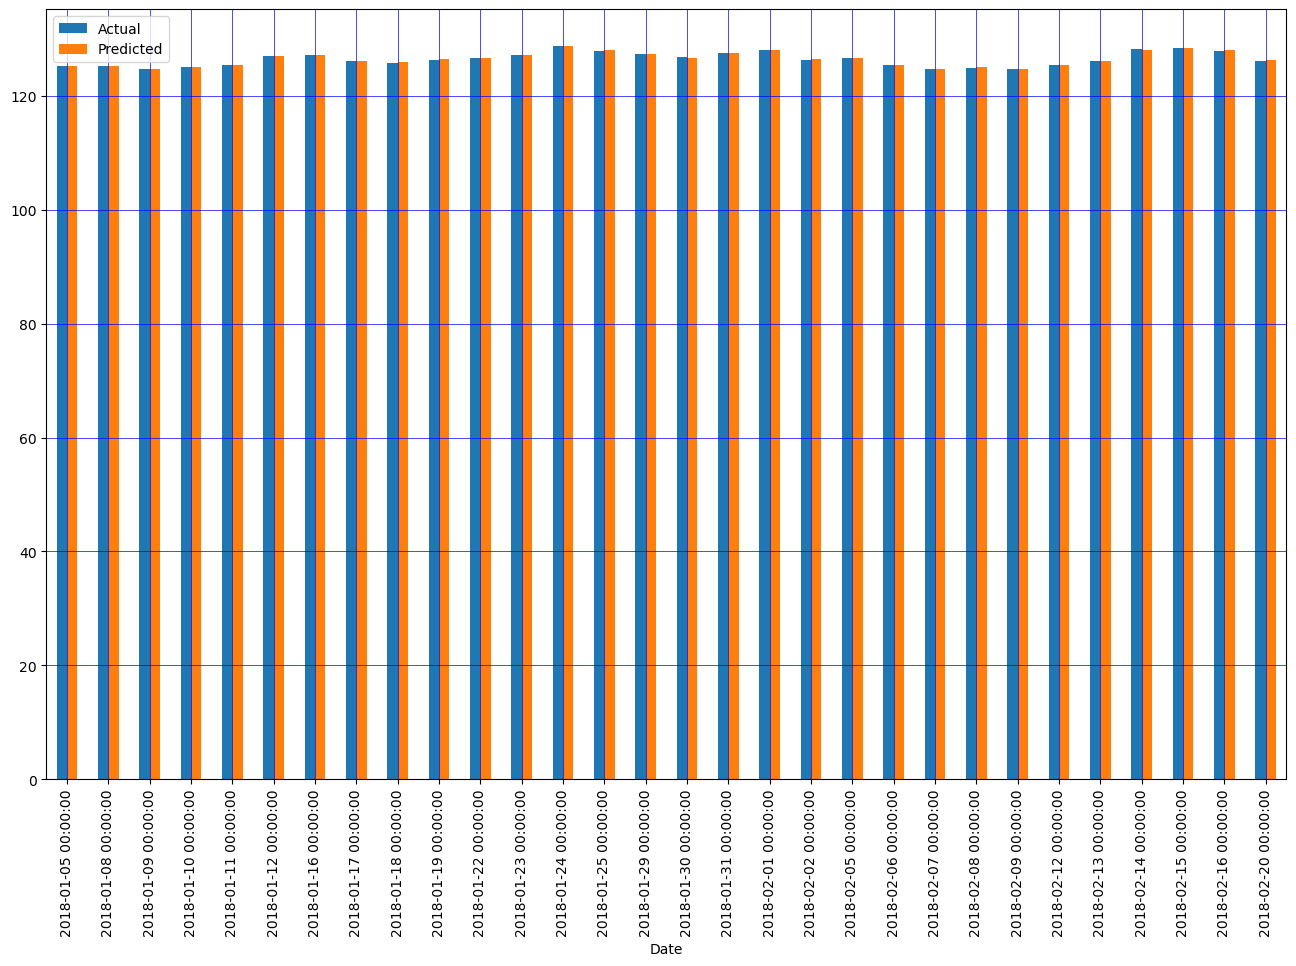

In [22]:
result_plot = result.head(30)
result_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()